In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Fraud_check.csv']))

In [5]:
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [6]:
df.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

In [7]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
df.rename({'Undergrad':'ug'},axis=1,inplace=True)
df.rename({'Marital.Status':'marital_status'},axis=1,inplace=True)
df.rename({'Taxable.Income':'taxable_income'},axis=1,inplace=True)
df.rename({'City.Population':'city_population'},axis=1,inplace=True)
df.rename({'Work.Experience':'work_exp'},axis=1,inplace=True)
df.rename({'Urban':'urban'},axis=1,inplace=True)

In [9]:
df.columns

Index(['ug', 'marital_status', 'taxable_income', 'city_population', 'work_exp',
       'urban'],
      dtype='object')

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(600, 6)

In [13]:
len(df)

600

In [14]:
df = df.iloc[:,[0,1,3,4,5,2]]
df.head(2)

ug marital_status  city_population  work_exp urban  taxable_income
0   NO         Single            50047        10   YES           68833
1  YES       Divorced           134075        18   YES           33700

In [15]:
df.taxable_income.describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: taxable_income, dtype: float64

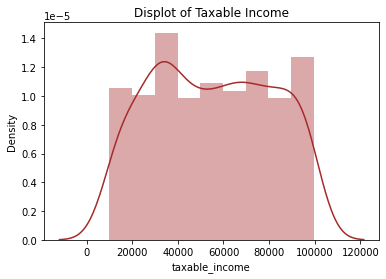

In [16]:
sns.distplot(df.taxable_income,kde=True,color='brown')
plt.title('Displot of Taxable Income');

In [17]:
df['tax_inc_catg'] = pd.cut(x=df['taxable_income'], bins=[1003,30000,99619], labels=['Risky','Good'],include_lowest=True)
df.head()

ug marital_status  city_population  work_exp urban  taxable_income  \
0   NO         Single            50047        10   YES           68833   
1  YES       Divorced           134075        18   YES           33700   
2   NO        Married           160205        30   YES           36925   
3  YES         Single           193264        15   YES           50190   
4   NO        Married            27533        28    NO           81002   

  tax_inc_catg  
0         Good  
1         Good  
2         Good  
3         Good  
4         Good

In [18]:
df.tax_inc_catg.value_counts()

Good     476
Risky    124
Name: tax_inc_catg, dtype: int64

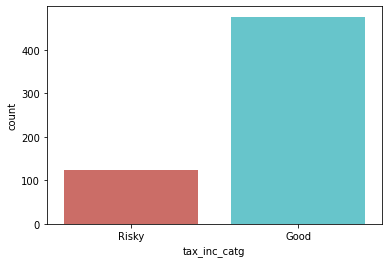

In [19]:
sns.countplot(x='tax_inc_catg',data=df, palette='hls');

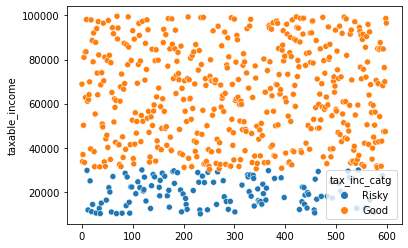

In [20]:
sns.scatterplot(data=df,x=df.index,y='taxable_income',hue='tax_inc_catg');

<font color='peach'><b>From the above plots we can see there is class imbalance in the target varaiable.

### <font color='maroon'><b>Encode Categorical variables :</b></font>

In [21]:
df_enc = pd.get_dummies(df,columns=['marital_status'],drop_first=True)
df_enc.head()

ug  city_population  work_exp urban  taxable_income tax_inc_catg  \
0   NO            50047        10   YES           68833         Good   
1  YES           134075        18   YES           33700         Good   
2   NO           160205        30   YES           36925         Good   
3  YES           193264        15   YES           50190         Good   
4   NO            27533        28    NO           81002         Good   

   marital_status_Married  marital_status_Single  
0                       0                      1  
1                       0                      0  
2                       1                      0  
3                       0                      1  
4                       1                      0

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

categ = ['urban','ug']
df_enc[categ] = df[categ].apply(le.fit_transform)
df_enc.head()

ug  city_population  work_exp  urban  taxable_income tax_inc_catg  \
0   0            50047        10      1           68833         Good   
1   1           134075        18      1           33700         Good   
2   0           160205        30      1           36925         Good   
3   1           193264        15      1           50190         Good   
4   0            27533        28      0           81002         Good   

   marital_status_Married  marital_status_Single  
0                       0                      1  
1                       0                      0  
2                       1                      0  
3                       0                      1  
4                       1                      0

In [24]:
df_enc.shape

(600, 8)

### <font color='maroon'><b>Split into independent and dependent variables :</b></font>

In [25]:
X = df_enc.drop(['taxable_income','tax_inc_catg'],axis=1)
X.head(3)

ug  city_population  work_exp  urban  marital_status_Married  \
0   0            50047        10      1                       0   
1   1           134075        18      1                       0   
2   0           160205        30      1                       1   

   marital_status_Single  
0                      1  
1                      0  
2                      0

In [26]:
y = df_enc['tax_inc_catg']

### <font color='maroon'><b>Feature Scaling :</b></font>

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
x = scaler.fit_transform(X)
x

array([[-1.040833  , -1.17852072, -0.62914254,  0.99335541, -0.6912543 ,
         1.32852435],
       [ 0.96076892,  0.50850002,  0.27636996,  0.99335541, -0.6912543 ,
        -0.75271484],
       [-1.040833  ,  1.03310911,  1.63463872,  0.99335541,  1.4466456 ,
        -0.75271484],
       ...,
       [-1.040833  ,  0.90969648, -1.76103318,  0.99335541, -0.6912543 ,
        -0.75271484],
       [ 0.96076892,  1.43219749,  0.1631809 , -1.00668904,  1.4466456 ,
        -0.75271484],
       [-1.040833  ,  0.9915901 ,  0.04999184, -1.00668904, -0.6912543 ,
        -0.75271484]])

### <font color='maroon'><b>Train Test Split :</b></font>

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

In [32]:
y_train.value_counts()

Good     381
Risky     99
Name: tax_inc_catg, dtype: int64

In [33]:
y_test.value_counts()

Good     95
Risky    25
Name: tax_inc_catg, dtype: int64

### <font color='hotpink'><b>Correct the Imbalanced data with Oversampling using SMOTE algorithm :

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state = 0)

In [36]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel())

In [37]:
print("After OverSampling, counts of label 'Good': {}".format(sum(y_train_smote == 'Good')))
print("After OverSampling, counts of label 'Risky': {}".format(sum(y_train_smote == 'Risky')))

After OverSampling, counts of label 'Good': 381
After OverSampling, counts of label 'Risky': 381


### <font color='orange'><b>Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=0)

In [40]:
rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=0)

In [41]:
train_pred = rf.predict(X_train_smote)
test_pred = rf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_train_smote,train_pred)

1.0

In [44]:
accuracy_score(y_test,test_pred)

0.6083333333333333

<font color='peach'><b>The model is over-fitting.

### <font color='lightgreen'><b>Plot tree

In [46]:
from sklearn.tree import plot_tree

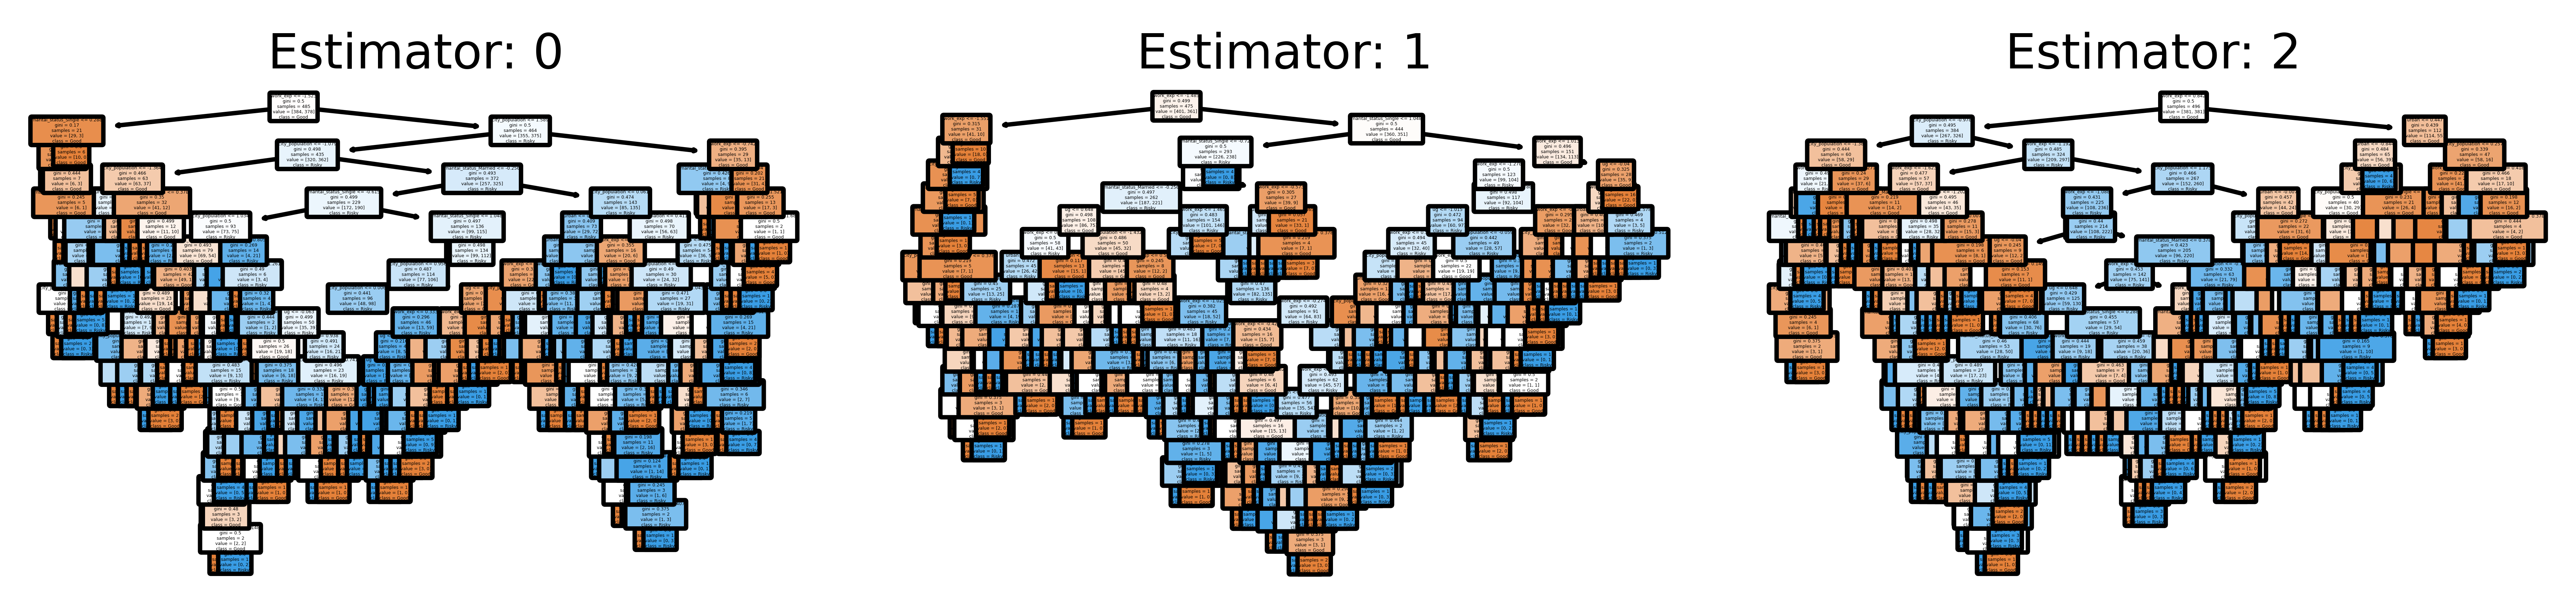

In [51]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    plot_tree(rf.estimators_[index],
                   feature_names = X.columns, 
                   class_names=y.unique(),
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

### <font color='cyan'><b>Hyperparameter Tuning with Grid Search CV

In [55]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
# Number of features to consider at every split
max_features = [6,None]
# Maximum number of levels in tree
max_depth =[2,3,4]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4]
# Maximum number of samples to be taken
max_samples = [0.5,0.75,1.0]
# Method of selecting samples for training each tree
bootstrap = [True,False]

In [53]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'max_samples' : max_samples,
              'bootstrap' : bootstrap}

In [56]:
rf_grid = GridSearchCV(rf, param_grid=param_grid)      # kfold cv where k=10

In [57]:
rf_grid.fit(X_train_smote,y_train_smote)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3, 4],
                         'max_features': [6, None],
                         'max_samples': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [58]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 6,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [59]:
rf_grid.best_score_

0.6365325077399381

In [60]:
rf2 = RandomForestClassifier(n_estimators=100,
                             max_features=6,
                             max_depth=4,
                             max_samples=1.0, 
                             min_samples_leaf=3, 
                             min_samples_split=2,
                             bootstrap=True,
                             random_state=0,
                             oob_score=True)

In [62]:
rf2.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=4, max_features=6, max_samples=1.0,
                       min_samples_leaf=3, oob_score=True, random_state=0)

In [63]:
train_pred1 = rf2.predict(X_train_smote)
test_pred1 = rf2.predict(x_test)

In [113]:
rf2.oob_score_

0.6443569553805775

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_train_smote,train_pred1)

0.7204724409448819

In [66]:
accuracy_score(y_test,test_pred1)

0.5333333333333333

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

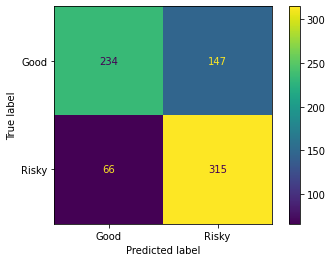

In [121]:
ConfusionMatrixDisplay.from_predictions(y_train_smote,train_pred1,display_labels=y.unique())
plt.grid(False);

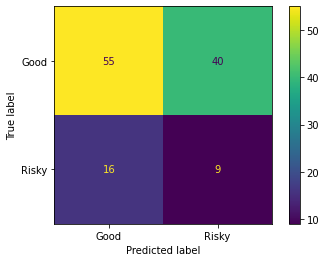

In [122]:
ConfusionMatrixDisplay.from_predictions(y_test,test_pred1,display_labels=y.unique())
plt.grid(False);

### <font color='lightgreen'><b>Plot tree

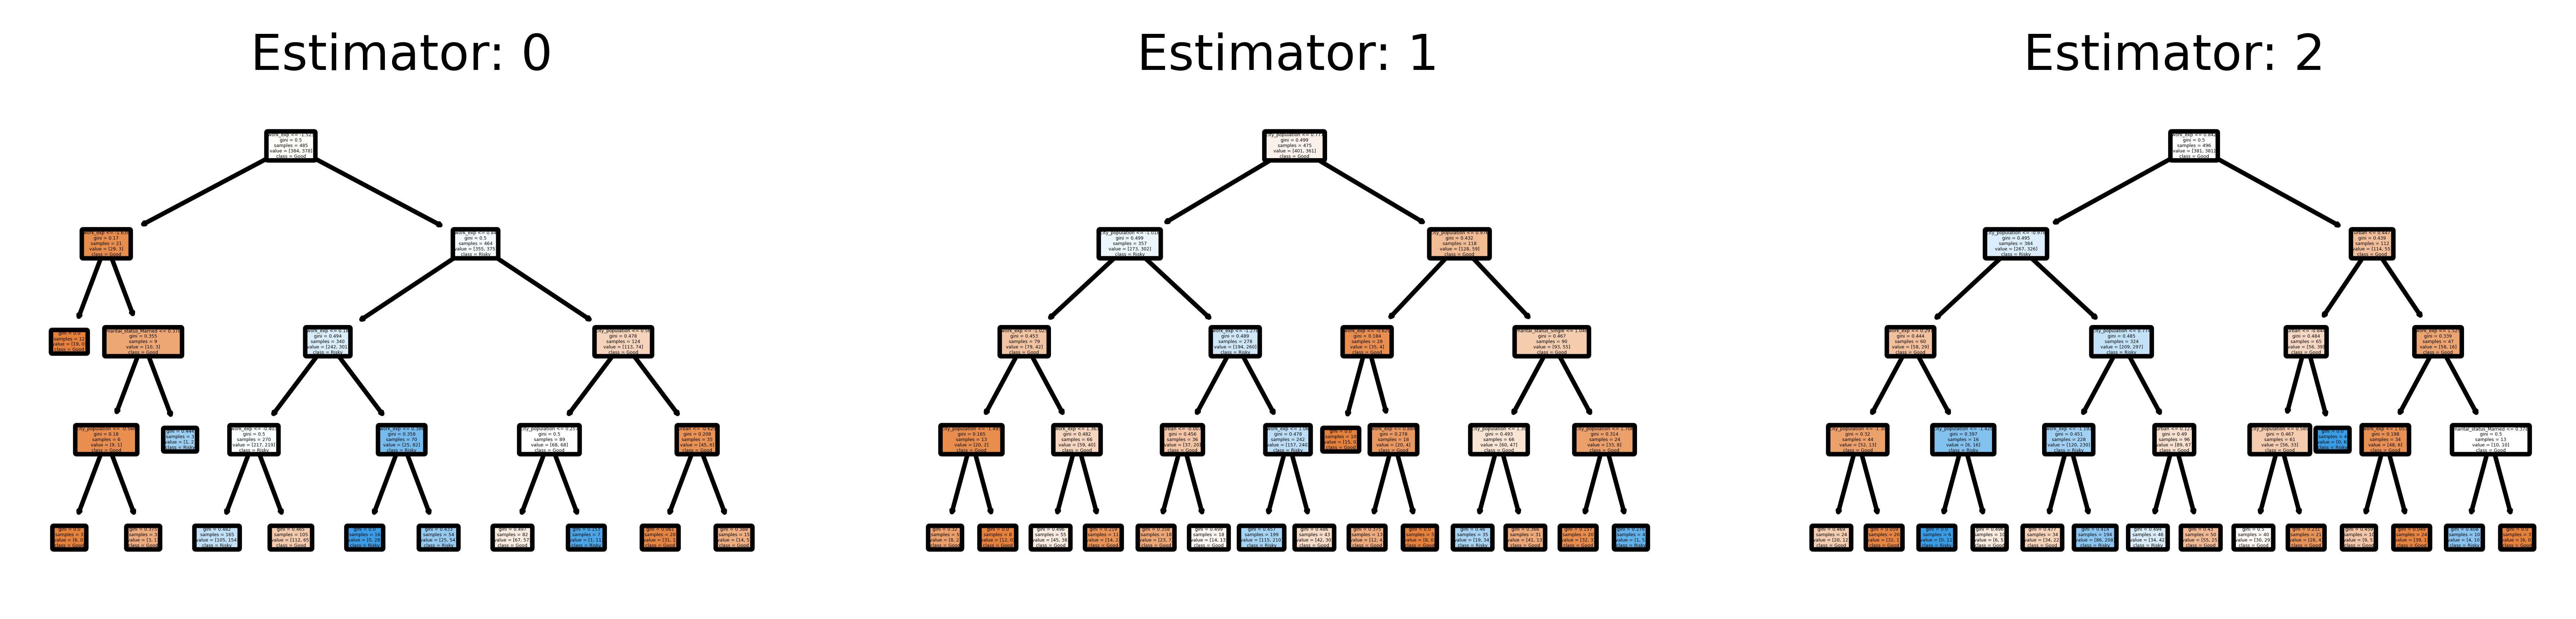

In [119]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    plot_tree(rf2.estimators_[index],
                   feature_names = X.columns, 
                   class_names=y.unique(),
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

#### <font color='violet'><b>With further tuning :

In [114]:
rf3 = RandomForestClassifier(n_estimators=100,
                             max_features=4,
                             max_depth=2,
                             max_samples=0.25, 
                             min_samples_leaf=4, 
                             min_samples_split=4,
                             bootstrap=True,
                             random_state=0,
                             oob_score=True)

In [115]:
rf3.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=2, max_features=4, max_samples=0.25,
                       min_samples_leaf=4, min_samples_split=4, oob_score=True,
                       random_state=0)

In [116]:
train_pred2 = rf3.predict(X_train_smote)
test_pred2 = rf3.predict(x_test)

In [117]:
accuracy_score(y_train_smote,train_pred2)

0.6509186351706037

In [118]:
accuracy_score(y_test,test_pred2)

0.5666666666666667

<font color='peach'>Now the train and test accuracy are within the range of +/- 10%.

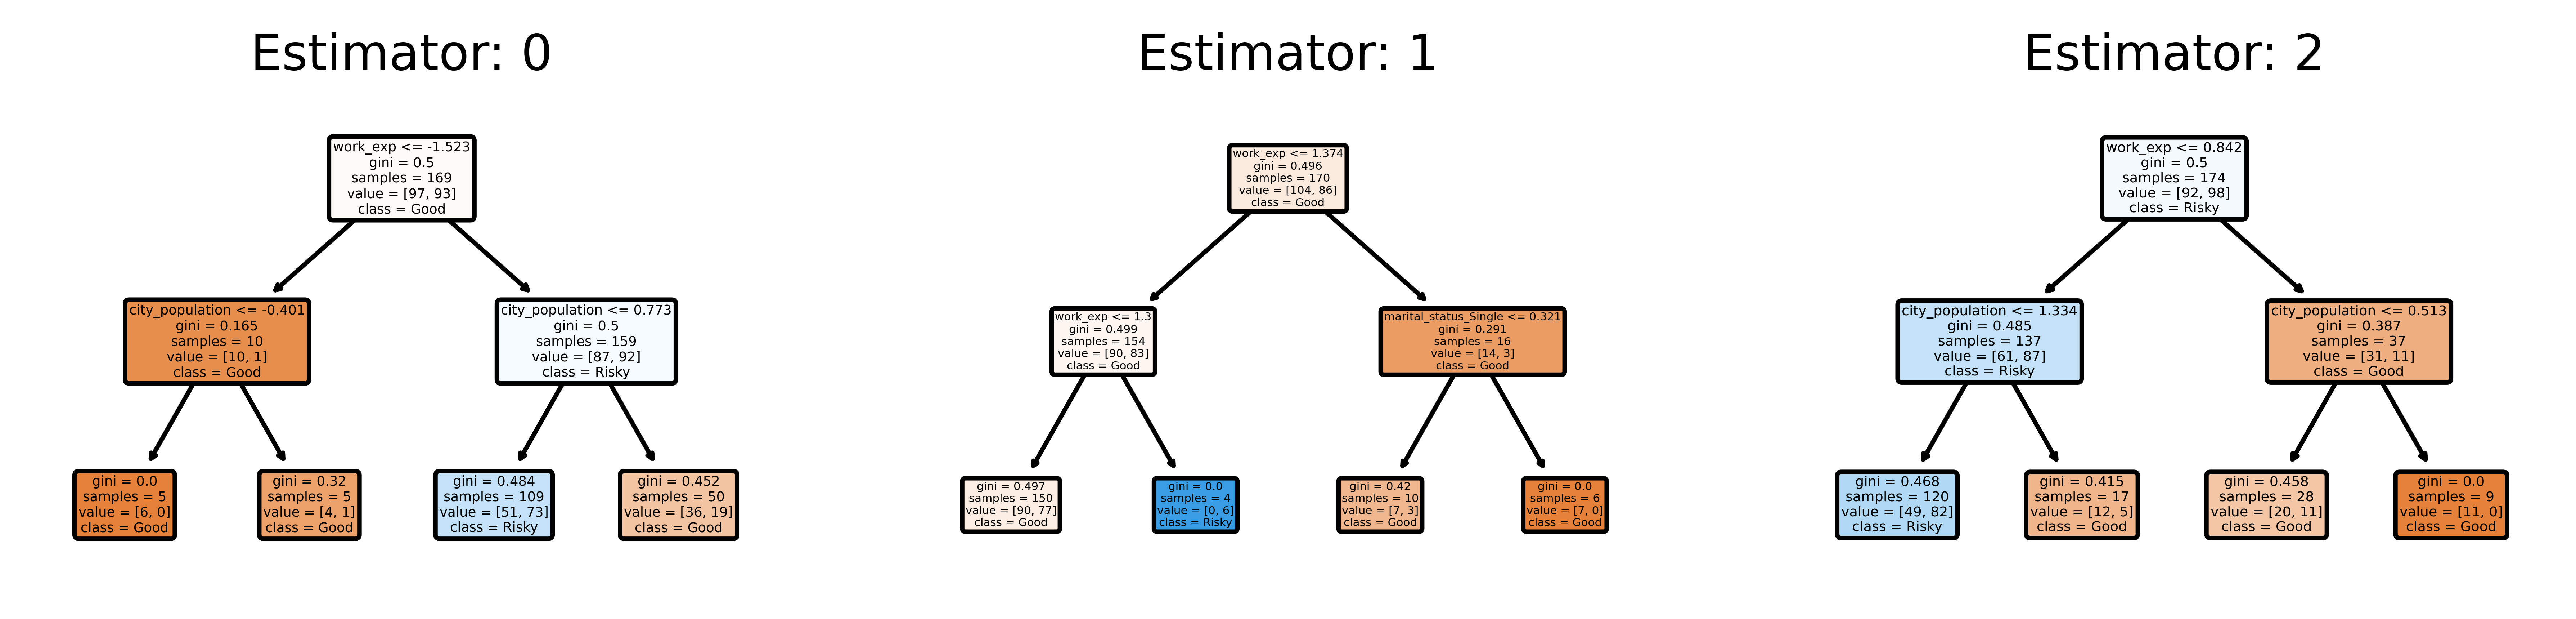

In [123]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    plot_tree(rf3.estimators_[index],
                   feature_names = X.columns, 
                   class_names=y.unique(),
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)